<a href="https://colab.research.google.com/github/sarveshmalagi/tensorflow_practice/blob/master/tf_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [0]:
from sklearn.datasets import make_blobs

In [0]:
data = make_blobs(n_samples=100, n_features=3, centers=2, random_state=101)

In [0]:
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [0]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [0]:
from mpl_toolkits.mplot3d import Axes3D

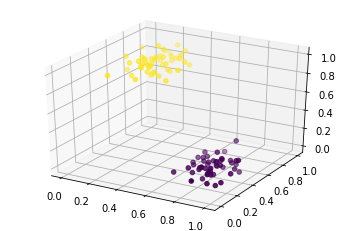

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_x, data_y, data_z, c=data[1])

In [0]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [0]:
n_input = 3
n_hidden = 2
n_output = n_input

In [0]:
learning_rate = 0.01

In [0]:
X = tf.placeholder(tf.float32, shape=[None, n_input])

In [0]:
hidden = fully_connected(X, n_hidden, activation_fn=None)
outputs = fully_connected(hidden, n_output, activation_fn=None)

Instructions for updating:
Please use `layer.__call__` method instead.


In [0]:
loss = tf.reduce_mean(tf.square(outputs-X))

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()

In [0]:
num_steps = 1000

with tf.Session() as sess:
  
  sess.run(init)
  
  for iterationn in range(num_steps):
    
    sess.run(train, feed_dict={X: scaled_data})
    
    output_2d = hidden.eval(feed_dict={X: scaled_data})

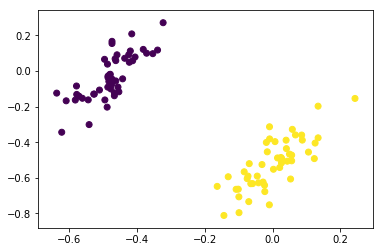

In [0]:
plt.scatter(output_2d[:, 0], output_2d[:, 1], c=data[1])